In [11]:
import matplotlib.pylab as plt
import matplotlib as mpl
from skimage import io
from skimage import data
import numpy as np
import math
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5) # width and height
mpl.rc('image', cmap='gray')

In [2]:
#image = io.imread("Lenna.png")
image = data.astronaut()

# variable type
print('variable type:', type(image) )

# data type
print('data type:', image.dtype)    

# print array shape/dimensions
print('array shape:', image.shape)  

# print number of array dimensions
print('number of dimensions:', image.ndim)  

# print number of elements in the array.
print('number of elements:', image.size)  

print(image[10,10])

variable type: <class 'numpy.ndarray'>
data type: uint8
array shape: (512, 512, 3)
number of dimensions: 3
number of elements: 786432
[59 57 86]


(-0.5, 511.5, 511.5, -0.5)

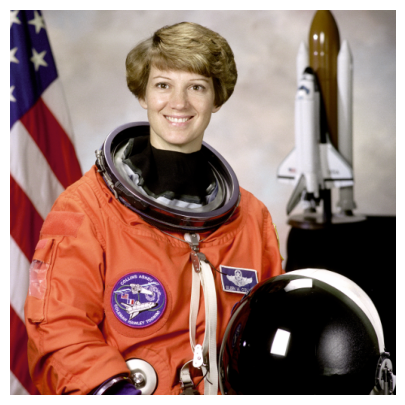

In [3]:
image[10,10] = [0,255,0]
fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

In [4]:
def rgb2gray(img):
    return 0.2125*img[:,:,0] + 0.7154*img[:,:,1] + 0.0721*img[:,:,2]

0.0
255.00000000000003


(-0.5, 511.5, 511.5, -0.5)

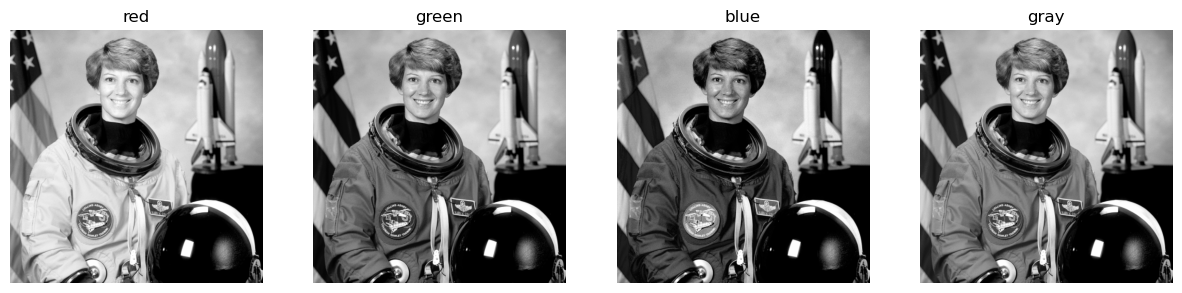

In [95]:
red = image[:,:,0]
green = image[:,:,1]
blue = image[:,:,2]

gray = rgb2gray(image)

print(gray.min())
print(gray.max())

fig, ax = plt.subplots(1,4,figsize=(15,15))

ax[0].imshow(red, cmap=plt.cm.gray)
ax[0].set_title("red")
ax[0].axis('off')
ax[1].imshow(green, cmap=plt.cm.gray)
ax[1].set_title("green")
ax[1].axis('off')
ax[2].imshow(blue, cmap=plt.cm.gray)
ax[2].set_title("blue")
ax[2].axis('off')
ax[3].imshow(gray)
ax[3].set_title("gray")
ax[3].axis('off')



In [21]:
def toBlocks(img, size_h=8, size_w=8):
    print("in toBlocks()")
    h, w = img.shape
    print(h, w)
    h, w = math.floor(h/size_h), math.floor(w/size_w)
    print(h, w)

    blocks = np.empty((h, w, size_h, size_w))
    print(blocks.shape)

    for J in range(h):
        for I in range(w):
            new_block = np.zeros((size_h, size_w))
            y_start, x_start = J*size_h, I*size_w
            for j in range(size_h):
                for i in range(size_w):
                    new_block[j][i] = img[y_start+j][x_start+i]
            blocks[J][I] = new_block
    return blocks

in toBlocks()
512 512
42 73
(42, 73, 12, 7)


(-0.5, 6.5, 11.5, -0.5)

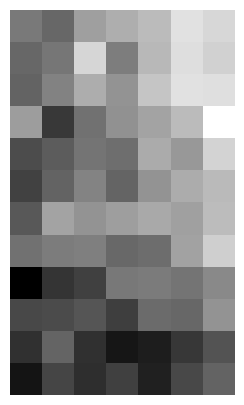

In [59]:
shape = (345, 728)

size_w = 7
size_h = 12

blocks = toBlocks(gray, size_h, size_w)

#print(blocks[0][0])

fig, ax = plt.subplots()

ax.imshow(blocks[3][16])
ax.axis('off')

In [78]:
def fromBlocks(img):
    (img_h, img_w, block_h, block_w) = img.shape
    output = np.zeros((img_h*block_h, img_w*block_w))
    for J in range(img_h):
        for I in range(img_w):
            block = img[J, I]
            for j in range(block_h):
                for i in range(block_w):
                    y = J * block_h + j
                    x = I * block_w + i
                    output[y, x] = block[j, i]
    return output

(-0.5, 510.5, 503.5, -0.5)

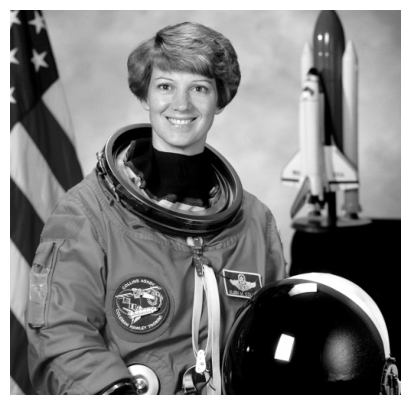

In [79]:
deblocked = fromBlocks(blocks)

fig, ax = plt.subplots()

ax.imshow(deblocked)
ax.axis('off')

In [8]:
sentence = ""
for x in range(32,127): sentence += chr(x)

print(sentence)
print(len(sentence))

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
95


<class 'PIL.PngImagePlugin.PngImageFile'>
PNG
<bound method Image.save of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x264B65EAB80>>
RGB
<class 'numpy.ndarray'>
float64
255.00000000000003
<class 'module'>


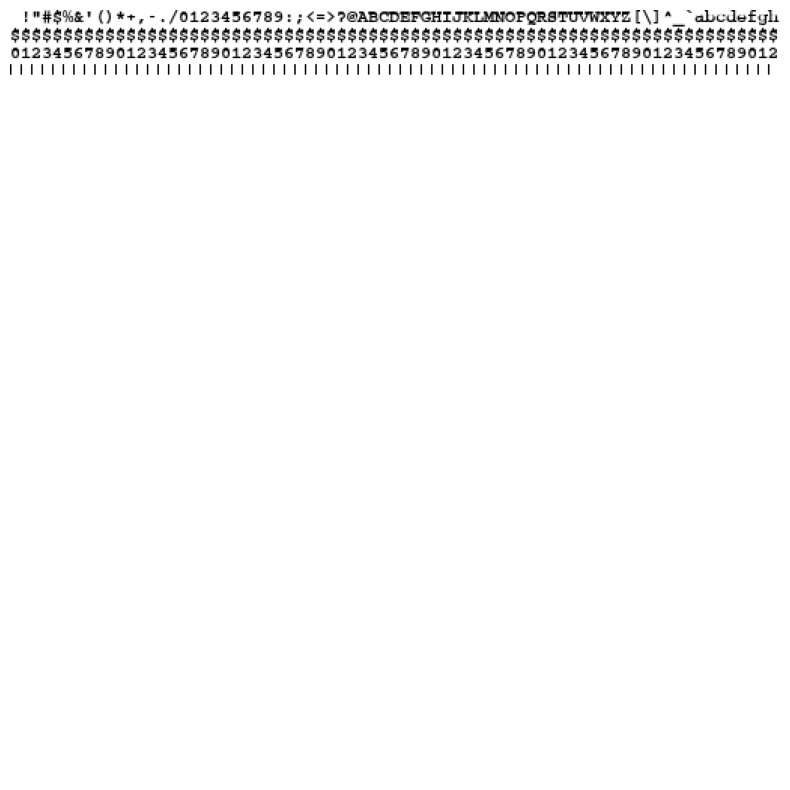

In [98]:
white_img = Image.open('white.png')
I1 = ImageDraw.Draw(white_img)
myFont = ImageFont.truetype('courier.ttf', 12)

sentence2 = ""
for i in range(9):
    for x in range(10):
        sentence2 += str(x)


spacing = 12
I1.text((0,0), sentence, font=myFont, fill=0)
I1.text((0,spacing), "$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$", font=myFont, fill=0)
I1.text((0,spacing*2), sentence2, font=myFont, fill=0)

print(white_img.getdata())

#img.show()

print(type(white_img))
print(white_img.format)
print(white_img.save)
print(white_img.mode)

sentence_data = np.asarray(white_img)
sentence_data = rgb2gray(sentence_data)
print(type(sentence_data))
print(sentence_data.dtype)
print(sentence_data[0][0])


print(type(data))

for i in range(int(512/7)):
    x = i * 7
    y_offset = spacing*3
    for j in range(7):
        sentence_data[y_offset+j][x] = 0


fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(sentence_data)
ax.axis('off')

imgFromData = Image.fromarray(sentence_data)
#imgFromData.show()

 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
(12, 665)
in toBlocks()
12 665
1 95
(1, 95, 12, 7)
(1, 95, 12, 7)


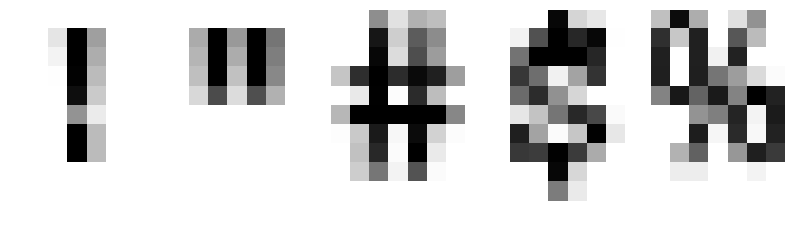

In [99]:
print(sentence)
characters = Image.open('ascii_char_holder.png')
I2 = ImageDraw.Draw(characters)
I2.text((0,0), sentence, font=myFont, fill=0)
#characters.show()

char_data = np.asarray(characters)
char_data = rgb2gray(char_data)
print(char_data.shape)
chars = toBlocks(char_data, 12, 7)

fig, ax = plt.subplots(1, 5)

print(chars.shape)
ax[0].imshow(chars[0][1])
ax[0].axis('off')
ax[1].imshow(chars[0][2])
ax[1].axis('off')
ax[2].imshow(chars[0][3])
ax[2].axis('off')
ax[3].imshow(chars[0][4])
ax[3].axis('off')
ax[4].imshow(chars[0][5])
ax[4].axis('off')

exclaim = Image.fromarray(chars[0][1])
#exclaim.show()

In [41]:
def averagePixDiff(im1, im2):
    if im1.shape != im2.shape:
        print("(in avePixDiff) Error: the shapes of two arrays doesn' match")
        return -1
    return (np.abs(im1-im2)).mean()

(-0.5, 6.5, 11.5, -0.5)

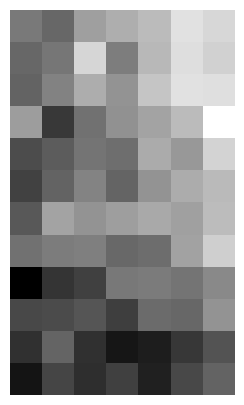

In [49]:
fig, ax = plt.subplots()

ax.imshow(blocks[3][16])
ax.axis('off')

98.26188809523812


(-0.5, 6.5, 11.5, -0.5)

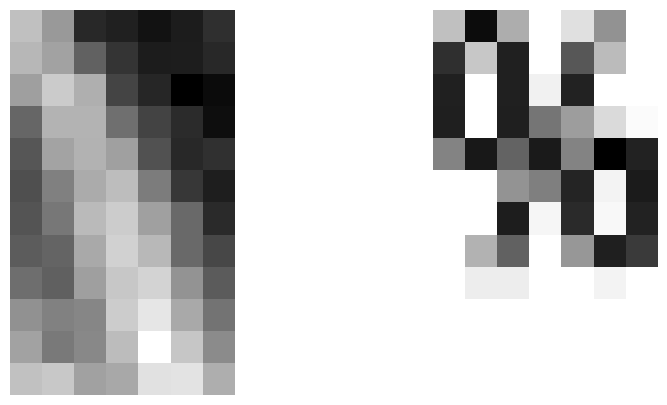

In [91]:
im1 = blocks[30][16]

best = chars[0][0]
min = 255
for char in chars[0]:
    aveDiff = averagePixDiff(im1, char)
    if aveDiff < min:
        min = aveDiff
        best = char

print(min)
fig, ax = plt.subplots(1,2)

ax[0].imshow(im1)
ax[0].axis('off')
ax[1].imshow(best)
ax[1].axis('off')

In [84]:
def findSmallestAvePixDiffBlock(im, blocks):
    min = 255
    best = blocks[0]
    for block in blocks:
        diff = averagePixDiff(im, block)
        if diff < min:
            min = diff
            best = block
    return best

188.0511
174.981


(-0.5, 6.5, 11.5, -0.5)

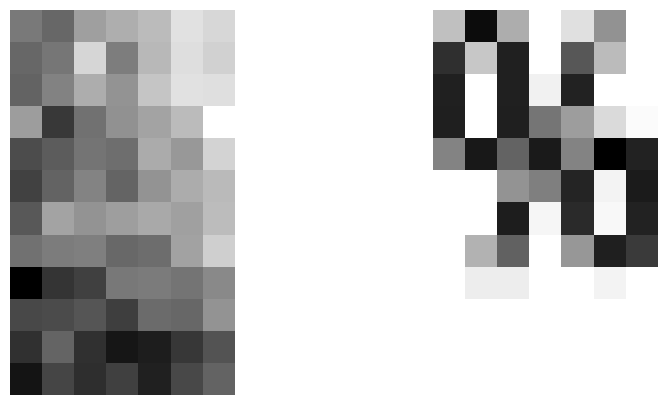

In [93]:
im1 = blocks[3][16]

print(im1.max())
print(im1.min())

best = findSmallestAvePixDiffBlock(im1, chars[0])

fig, ax = plt.subplots(1,2)

ax[0].imshow(im1)
ax[0].axis('off')
ax[1].imshow(best)
ax[1].axis('off')

(42, 73, 12, 7)


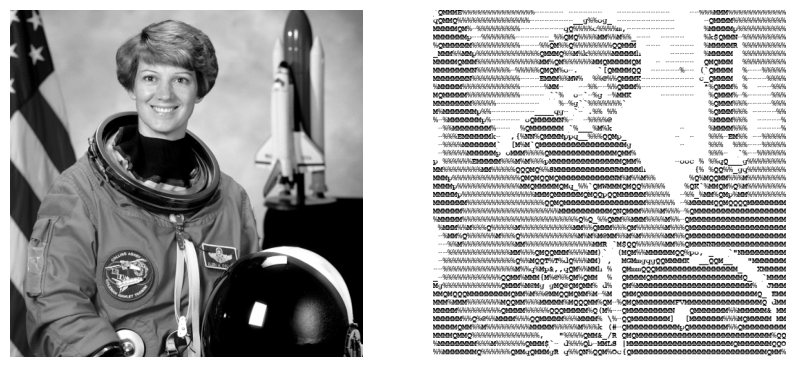

In [101]:
ascii_blocks = np.empty(blocks.shape)
print(ascii_blocks.shape)

for J in range(blocks.shape[0]):
    for I in range(blocks.shape[1]):
        block = blocks[J, I]
        best_block = findSmallestAvePixDiffBlock(block, chars[0])
        #best_block = chars[0][5]
        ascii_blocks[J, I] = best_block

ascii = fromBlocks(ascii_blocks)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(fromBlocks(blocks))
ax[0].axis('off')
ax[1].imshow(ascii)
ax[1].axis('off')

ascii_img = Image.fromarray(ascii)
#ascii_img.show()